In [13]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
def find_the_way(path,file_format,con=""):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                if con in file:
                    files_add.append(os.path.join(r, file))  
            
    return files_add

In [15]:
#datasets=find_the_way("./results/other","2.csv")

In [16]:
def hm(cm,target_names,say):
    graph_name=f"./results/cms/{say}_confusion matrix.pdf"   
    #plt.figure(figsize = (5,4))
    plt.figure(figsize = (len(datasetnames),int((len(target_names)/5)*4)))
    sns.heatmap(cm,xticklabels=datasetnames, yticklabels=target_names, annot=True, fmt='g')
    plt.ylabel("FEATURES")
    plt.xlabel("DATASETS")
    plt.savefig(graph_name,bbox_inches='tight')#, dpi=400)

    plt.show()
    #print(cm)
    print("\n\n\n") 
    cm=pd.DataFrame(heatmap, columns =datasetnames,index=target_names)
    cm.to_csv(graph_name.replace(".pdf",".csv"))



In [17]:
file_list={"DD11":['./small/AD-S1.csv','./small/DI-S1.csv','./small/DI-S2.csv'],
"DD11T":['./small/DI-S1.csv','./small/AD-S1.csv','./small/AD-S2.csv'],
"DD12":['./small/AD-S1.csv','./small/DI-S2.csv','./small/DI-S1.csv'],
"DD12T":['./small/DI-S2.csv','./small/AD-S1.csv','./small/AD-S2.csv'],
"DD22":['./small/AD-S2.csv','./small/DI-S2.csv','./small/DI-S1.csv'],
"DD22T":['./small/DI-S2.csv','./small/AD-S2.csv','./small/AD-S1.csv'],
"DD21":['./small/AD-S2.csv','./small/DI-S1.csv','./small/DI-S2.csv'],
"DD21T":['./small/DI-S1.csv','./small/AD-S2.csv','./small/AD-S1.csv']}

datasetnames=['DD11', 'DD11T', 'DD12', 'DD12T', 'DD22', 'DD22T', 'DD21', 'DD21T', "MEAN"]

In [18]:
say=0
dataset="./results/other/3"
heatmap=[]
target_names=[]
say+=1
IoTDevID=[]
for ii in file_list:
    file=f"{dataset}/@{file_list[ii][0][8:-4]}@{file_list[ii][1][8:-4]}.csv"
    df=pd.read_csv(file)
    IoTDevID.append(round(df["F1"].mean(),3))

IoTDevID.append(round(sum(IoTDevID)/len(IoTDevID),3))


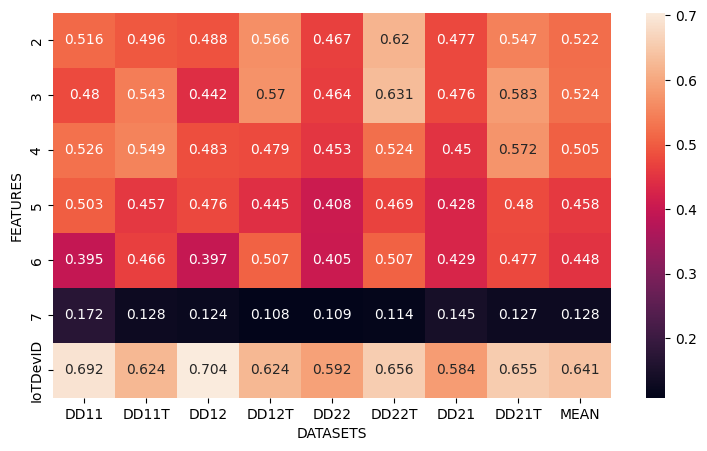

In [19]:
say=0
dataset="./results/other/1"
heatmap=[]
target_names=[]
for no in range(2,8):
    say+=1
    row=[]
    for ii in file_list:
        file=f"{dataset}/@{file_list[ii][0][8:-4]}@{file_list[ii][1][8:-4]}_{no}.csv"
        df=pd.read_csv(file)
        row.append(round(df["F1"].mean(),3))
    row.append(round(sum(row)/len(row),3))
    target_names.append(no)
    heatmap.append(row)

target_names.append("IoTDevID")
heatmap.append(IoTDevID)

hm(heatmap,target_names,say)

In [20]:
heatmap

[[0.516, 0.496, 0.488, 0.566, 0.467, 0.62, 0.477, 0.547, 0.522],
 [0.48, 0.543, 0.442, 0.57, 0.464, 0.631, 0.476, 0.583, 0.524],
 [0.526, 0.549, 0.483, 0.479, 0.453, 0.524, 0.45, 0.572, 0.505],
 [0.503, 0.457, 0.476, 0.445, 0.408, 0.469, 0.428, 0.48, 0.458],
 [0.395, 0.466, 0.397, 0.507, 0.405, 0.507, 0.429, 0.477, 0.448],
 [0.172, 0.128, 0.124, 0.108, 0.109, 0.114, 0.145, 0.127, 0.128],
 [0.692, 0.624, 0.704, 0.624, 0.592, 0.656, 0.584, 0.655, 0.641]]

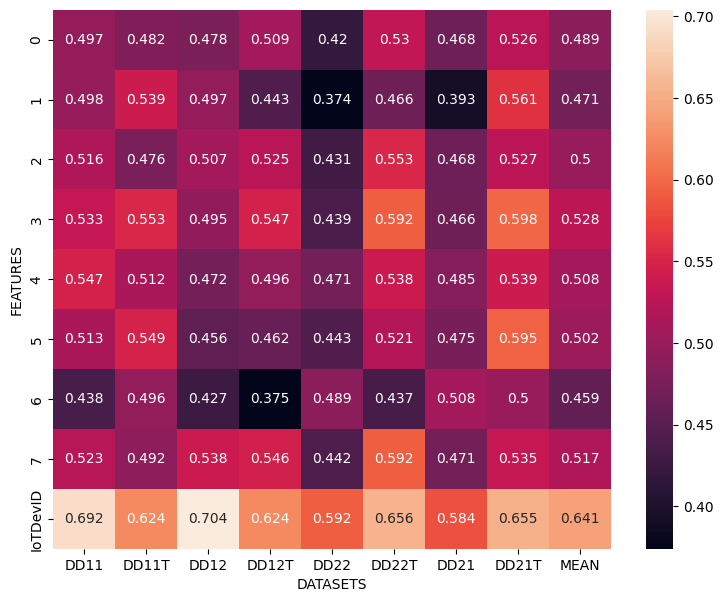

In [21]:
say=0
dataset="./results/other/2"
heatmap=[]
target_names=[]
for no in range(0,8):
    say+=1
    row=[]
    for ii in file_list:
        file=f"{dataset}/@{file_list[ii][0][8:-4]}@{file_list[ii][1][8:-4]}_{no}.csv"
        df=pd.read_csv(file)
        row.append(round(df["F1"].mean(),3))
    row.append(round(sum(row)/len(row),3))
    target_names.append(no)
    heatmap.append(row)

target_names.append("IoTDevID")
heatmap.append(IoTDevID)

hm(heatmap,target_names,say)

In [22]:
labels={1:{2:"VOTE-2",3:"VOTE-3",4:"VOTE-4",5:"VOTE-5",6:"VOTE-6",7:"VOTE-7"},2:{0:"OF-1",1:"OF-2",2:"OF-3",3:"OF-4",4:"OF-5",5:"OF-6",6:"OF-7",7:"OF-8",8:"OF-9"}}

1 0
1 1
1 8
1 9
2 8
2 9


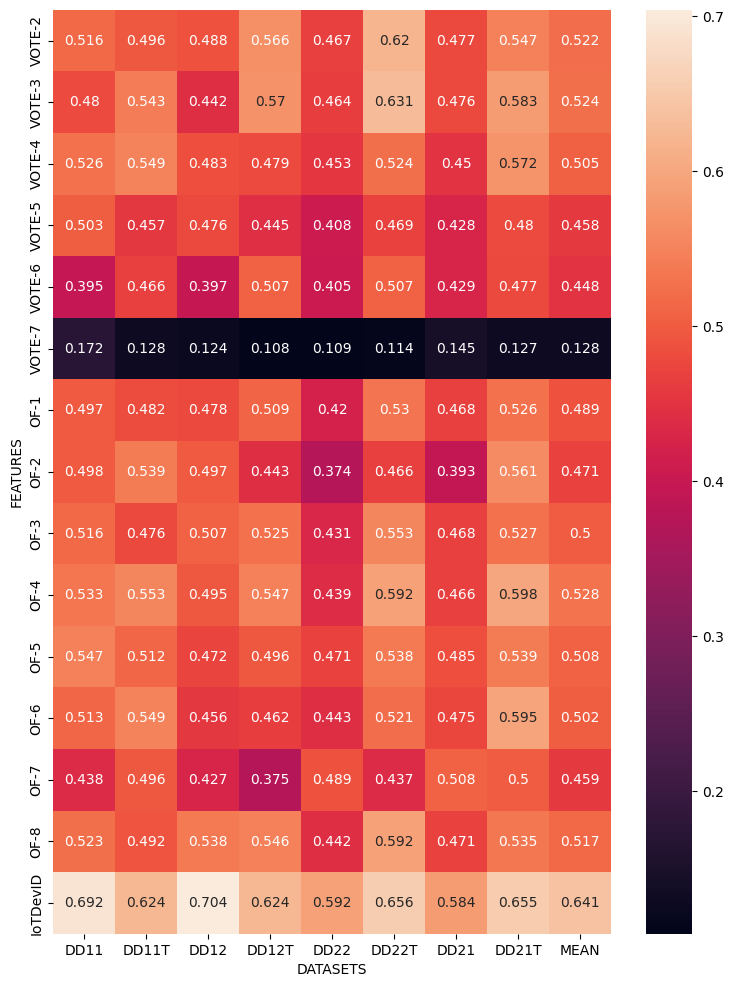

In [23]:
heatmap=[]
target_names=[]
for i in [1,2]:
    dataset=f"./results/other/{i}"
    for no in range(0,10):
        try:
            say+=1
            row=[]
            for ii in file_list:
                file=f"{dataset}/@{file_list[ii][0][8:-4]}@{file_list[ii][1][8:-4]}_{no}.csv"
                df=pd.read_csv(file)
                row.append(round(df["F1"].mean(),3))
            row.append(round(sum(row)/len(row),3))
            target_names.append(labels[i][no])
            heatmap.append(row)
        except:print(i,no)
    #heatmap.append([0,0,0,0,0,0,0,0])


target_names.append("IoTDevID")
heatmap.append(IoTDevID)

hm(heatmap,target_names,say)

'VOTE-2'

In [ ]:
def hm(cm,target_names,say):
    graph_name=f"./results/cms/{say}_confusion matrix.pdf"   
    #plt.figure(figsize = (5,4))
    plt.figure(figsize = (len(list(file_list.keys())),int((len(target_names)/5)*4)))
    sns.heatmap(cm,xticklabels=list(file_list.keys()), yticklabels=target_names, annot=True, fmt='g')
    plt.ylabel("TRAINING")
    plt.xlabel("TESTING")
    plt.savefig(graph_name,bbox_inches='tight')#, dpi=400)

    plt.show()
    #print(cm)
    print("\n\n\n") 
    cm=pd.DataFrame(heatmap, columns =list(file_list.keys()),index=target_names)
    cm.to_csv(graph_name.replace(".pdf",".csv"))

